# K Means Cluster Algorithm

**What is K-Means Algorithm?**

K-Means Clustering is an Unsupervised Learning algorithm
, which groups the unlabeled dataset into different clusters. Here K defines the number of pre-defined clusters that need to be created in the process, as if K=2, there will be two clusters, and for K=3, there will be three clusters, and so on.

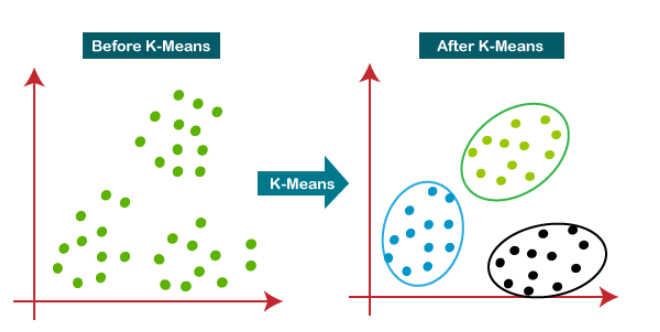

For selection of the best value of K this algorithm uses **Elbow method**.


# **Elbow Method**
The Elbow method is one of the most popular ways to find the optimal number of clusters. This method uses the concept of WCSS value. WCSS stands for Within Cluster Sum of Squares, which defines the total variations within a cluster. The formula to calculate the value of WCSS (for 3 clusters) is given below:

### **WCSS= ∑Pi in Cluster1 distance(Pi C1)2 +∑Pi in Cluster2distance(Pi C2)2+∑Pi in CLuster3 distance(Pi C3)2**

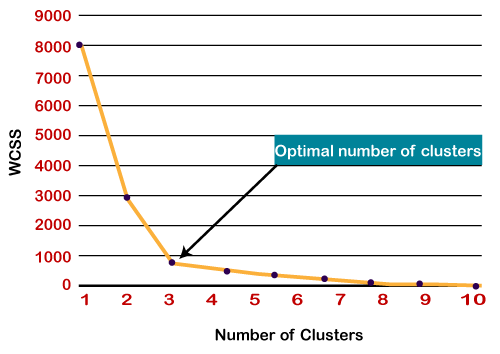

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

## Importing the dataset from the directory

In [90]:
df= pd.read_csv("income.csv")

In [91]:
df

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


## Plotting the dataset in scatter plot

Text(0, 0.5, 'Income')

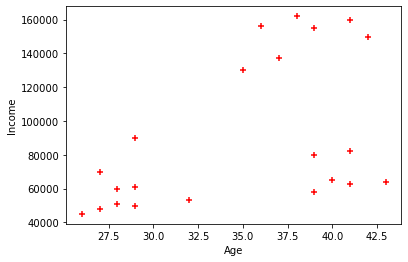

In [92]:
plt.scatter(df['Age'], df['Income($)'],  color = "r", marker ="+")
plt.xlabel("Age")
plt.ylabel("Income")

### Buliding the Kmeans object

In [93]:
# Kmean object creation
km  = KMeans(n_clusters =3)
km

KMeans(n_clusters=3)

In [94]:
#using fit and predict simultanously
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

In [95]:
#append the data into the dataframe

df["cluster"] = y_predicted

In [96]:
df

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1
5,Gautam,39,155000,1
6,David,41,160000,1
7,Andrea,38,162000,1
8,Brad,36,156000,1
9,Angelina,35,130000,1


No handles with labels found to put in legend.


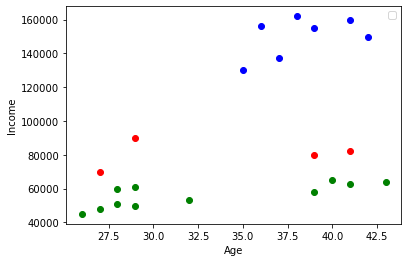

In [97]:
df1= df[df.cluster==0]
df2= df[df.cluster==1]
df3= df[df.cluster==2]
plt.scatter(df1.Age,df1["Income($)"], color ="r")
plt.scatter(df2.Age,df2["Income($)"], color ="b")
plt.scatter(df3.Age,df3["Income($)"], color ="g")

plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()

# Data Scaling 

In [99]:
from sklearn.preprocessing import MinMaxScaler

**Data Scaling** is a data preprocessing step for numerical features. Many machine learning algorithms like Gradient descent methods, KNN algorithm, linear and logistic regression, etc. require data scaling to produce good results. Various scalers are defined for this purpose.

In [100]:
scaler = MinMaxScaler()

In [125]:
scaler.fit(df[['Income($)']])

df["Income($)"] = scaler.transform(df[["Income($)"]])

scaler.fit(df[["Age"]])
df["Age"] = scaler.transform(df[["Age"]])

In [126]:
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


# KMeans Algorithm for Scaled dataset



In [128]:
km = KMeans(n_clusters = 3)
y_predicted = km.fit_predict(df[['Age', 'Income($)']])
y_predicted

array([0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [131]:
df["Scaled_cluster"] = y_predicted
df

,Name,Age,Income($),cluster,Scaled_cluster
0,Rob,0.058824,0.213675,0,0
1,Michael,0.176471,0.384615,0,0
2,Mohan,0.176471,0.136752,2,0
3,Ismail,0.117647,0.128205,2,0
4,Kory,0.941176,0.897436,1,2
5,Gautam,0.764706,0.940171,1,2
6,David,0.882353,0.982906,1,2
7,Andrea,0.705882,1.000000,1,2
8,Brad,0.588235,0.948718,1,2
9,Angelina,0.529412,0.726496,1,2


In [132]:
n_df = df.drop(['cluster'],axis = 1)

In [133]:
n_df

,Name,Age,Income($),Scaled_cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,2
5,Gautam,0.764706,0.940171,2
6,David,0.882353,0.982906,2
7,Andrea,0.705882,1.000000,2
8,Brad,0.588235,0.948718,2
9,Angelina,0.529412,0.726496,2


No handles with labels found to put in legend.


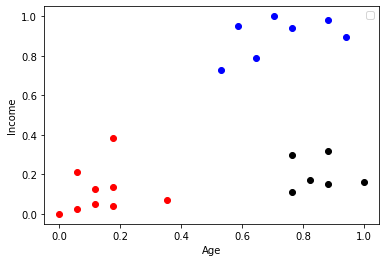

In [140]:
df1= n_df[n_df.Scaled_cluster==0]
df2= n_df[n_df.Scaled_cluster==1]
df3= n_df[n_df.Scaled_cluster==2]
plt.scatter(df1.Age,df1["Income($)"], color ="r")
plt.scatter(df2.Age,df2["Income($)"], color ="black")
plt.scatter(df3.Age,df3["Income($)"], color ="b")

plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()

## Now we can see the better visualisation of the data that we have scaled.
## Each data belogs to particular kind of cluster.

**To Find the centroids of the clusters we use cluster_centers_**

In [157]:
cl = km.cluster_centers_

In [158]:
cl

array([[0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ],
       [0.72268908, 0.8974359 ]])

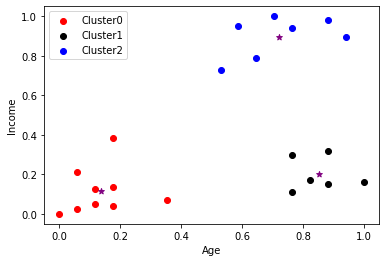

In [180]:
df1= n_df[n_df.Scaled_cluster==0]
df2= n_df[n_df.Scaled_cluster==1]
df3= n_df[n_df.Scaled_cluster==2]
plt.scatter(df1.Age,df1["Income($)"], color ="r",  label = "Cluster0")
plt.scatter(df2.Age,df2["Income($)"], color ="black", label = "Cluster1")
plt.scatter(df3.Age,df3["Income($)"], color ="b", label = "Cluster2")
plt.scatter(cl[:,0],cl[:,1], color = "purple", marker = '*')

plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()

In [188]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters = k)
    km.fit(df[["Age", "Income($)"]])
    sse.append(km.inertia_)
sse

C:\Users\Santosh Paul\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[5.434011511985582,
 2.0911363886970387,
 0.47507834985474384,
 0.3491047094414904,
 0.28184797443684706,
 0.21066678488018922,
 0.16858512236026593,
 0.13265419827233557,
 0.10629897421411025]

## Elbow plot

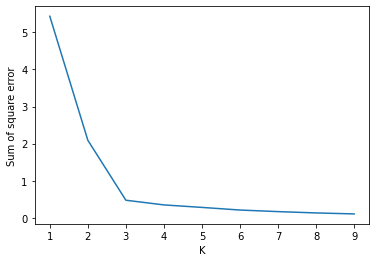

In [191]:
plt.xlabel("K")
plt.ylabel("Sum of square error")
plt.plot(k_rng,sse)

## Exercise

In [193]:
from sklearn.datasets import load_iris

In [204]:
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [207]:
df = pd.DataFrame(iris.data,columns = iris.feature_names)

In [209]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [211]:
df = df.drop(['sepal length (cm)', 'sepal width (cm)'], axis = "columns")

In [213]:
df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [220]:
from sklearn.cluster import KMeans

In [226]:
k_rnf = range(1,10)
sse=[]
for k in k_rng:
    km = KMeans(n_clusters = k)
    km.fit(df[["petal length (cm)","petal width (cm)"]])
    sse.append(km.inertia_)
    
sse

C:\Users\Santosh Paul\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[550.8953333333333,
 86.39021984551391,
 31.371358974358966,
 19.48300089968511,
 13.91690875790876,
 11.02514511025038,
 9.191170634920635,
 7.8178205031683285,
 6.456494541406302]

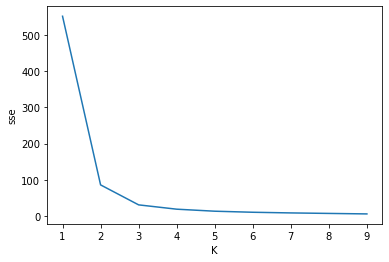

In [227]:
plt.xlabel("K")
plt.ylabel("sse")
plt.plot(k_rng,sse)